In [96]:
%matplotlib inline 
import pandas as pd
import numpy as np
import pdb
import matplotlib.pyplot as plt

In [97]:

train_data = pd.read_csv('../train.csv')  # set the data as index column (time series)
train_data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [98]:
train_data.shape

(114321, 133)

In [99]:
test_data = pd.read_csv('../test.csv')  # set the data as index column (time series)
test_data.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [100]:
test_data.shape

(114393, 132)

In [101]:
print len(np.unique(train_data.v1.values))

114319


### Features Analysis

In [102]:
categ_columns = train_data.columns[train_data.dtypes == 'object']
categ_df = train_data[categ_columns]
modalities = []
def fct(x):
    return len(np.unique(x))

modalities = categ_df.apply(fct,axis=0)
print modalities

v3          4
v22     18211
v24         5
v30         8
v31         4
v47        10
v52        13
v56       123
v66         3
v71         9
v74         3
v75         4
v79        18
v91         8
v107        8
v110        3
v112       23
v113       37
v125       91
dtype: int64


Les features v22,v56 et v125 ont des modalités très grandes. L'effet de ces modalités est ponctuel et n'aura donc pas un grand effet sur la variable cible. De plus, la binarization de ces features generera une matrice de grande dimension difficile à supporter en mémoire. Ces colonnes vont être supprimés.

In [103]:
numeric_columns = train_data.columns[train_data.dtypes != 'object']
numeric_df = train_data[numeric_columns]

In [104]:
numeric_df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


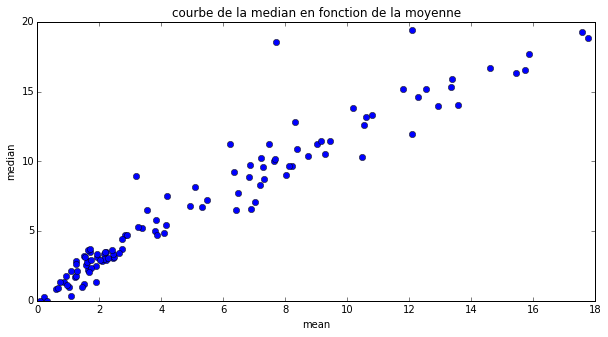

In [105]:
## drop id and target
numeric_df.drop(['ID','target'],axis=1,inplace=True)

def funct(x):
    return(np.mean(x),np.median(x))

res = numeric_df.apply(funct,axis=0)


mean = zip(*res.values)[0]
median = zip(*res.values)[1]

# tracage de la courbe
fig = plt.figure(figsize=(10,5),linewidth=8)
plt.plot(mean,median,'bo')
plt.xlabel('mean')
plt.ylabel('median')
plt.title('courbe de la median en fonction de la moyenne')

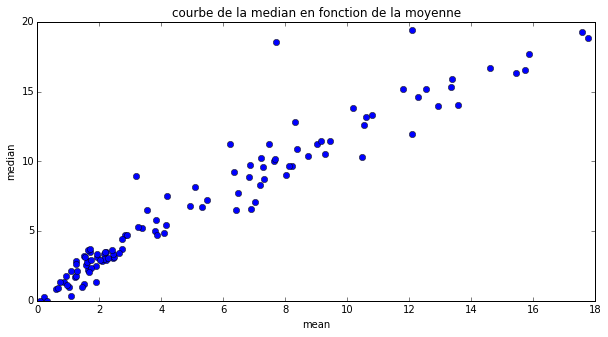

Si on trace une regression, on aura une pente de coefficient directeur presque égale à 1 ce qui signifie que la moyenne est presque égale à la médiane dans chaque direction d'ou l'absence d'outliers